In [224]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
import numpy as np
from selenium import webdriver

In [225]:
def PosterToArray(image):
    poster = np.array(image)
    poster = poster.astype('float32') / 255
    return poster

In [226]:
def modelInit():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])
    return model

In [227]:
def PredictByModel(ourGenre, posterArray, model):
    checkpoint_path = f"Weights/{ourGenre}/cp.ckpt"
    model.load_weights(checkpoint_path).expect_partial()
    predicted = model.predict(posterArray)
    return (predicted[0], ourGenre)
    
    

In [228]:
def PredictAllModes(posterPath, model):
    poster = Image.open(posterPath)
    poster = poster.resize((100,100))
    numPyPoster = PosterToArray(poster)
    posterArray = [numPyPoster]
    posterArray = np.array(posterArray) 
    
    for i in range(len(Genres)):
        allPredictions.append(PredictByModel(Genres[i], posterArray, model))


In [229]:
def ThreeGenres():
    tempSort = []
    recommendedGenres=[]
    for i in range(len(allPredictions)):
        temp = [allPredictions[i][0][1] , allPredictions[i][1]]
        tempSort.append(temp)
    tempSort.sort()
    tempSort.reverse()
    print(f"Genre1: {tempSort[0][1]} ({np.round((tempSort[0][0] * 100),2)}%)    Genre2: {tempSort[1][1]} ({np.round(tempSort[1][0] * 100,2)}%)    Genre3: {tempSort[2][1]}({np.round(tempSort[2][0] * 100,2)}%)")
    recommendedGenres.append(tempSort[0][1])
    recommendedGenres.append(tempSort[1][1])
    recommendedGenres.append(tempSort[2][1])
    return recommendedGenres
    

In [230]:
def Selenium(URL, imgName):
    chromeDriverPATH = "C:\Program Files (x86)\chromedriver.exe"
    driver = webdriver.Chrome(chromeDriverPATH)
    driver.get(URL)
    S = lambda X: driver.execute_script('return document.body.parentNode.scroll'+X)
    driver.set_window_size(S('Width'),S('Height'))                                                                                                                
    driver.find_element_by_tag_name('body').screenshot(f'{imgName}.png')
    driver.quit()

In [236]:
Genres = ['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']
posterPath = "TestImages/test5.jpg"
movieName = "RedNotice" #MUST HAVE NO SPACES
recommendedGenres = []
allPredictions = []
model = modelInit()
PredictAllModes(posterPath, model)
recommendedGenres = ThreeGenres()


Genre1: Thriller (100.0%)    Genre2: Drama (99.87%)    Genre3: Adventure(97.22%)


In [237]:
# for debugging
allPredictions
recommendedGenres

['Thriller', 'Drama', 'Adventure']

In [238]:
realGenreURL = f"https://www.google.com/search?q={movieName}+movie+genres&gl=us&hl=en"
URLrecommend = f"https://www.imdb.com/search/title/?genres={recommendedGenres[0]},{recommendedGenres[1]},{recommendedGenres[2]}&explore=title_type,genres"

Selenium(realGenreURL, 'realGenre')
Selenium(URLrecommend, 'recommendedMovies')

C:\Users\amrme\AppData\Local\Temp/ipykernel_18180/3230271238.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromeDriverPATH)
C:\Users\amrme\AppData\Local\Temp/ipykernel_18180/3230271238.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_tag_name('body').screenshot(f'{imgName}.png')


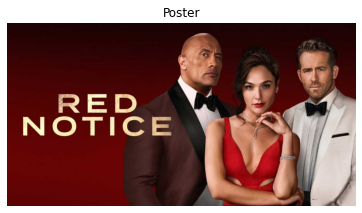

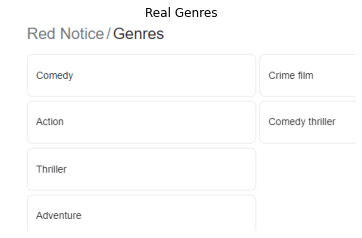

Genre1: Thriller (100.0%)    Genre2: Drama (99.87%)    Genre3: Adventure(97.22%)


['Thriller', 'Drama', 'Adventure']

In [239]:
im = Image.open(posterPath)
width, height = im.size # Size of the image in pixels (size of original image)
plt.figure(figsize=(50, 10))
plt.subplot(2, 10, 1)
plt.imshow(im)
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.title("Poster")


im2 = Image.open("realGenre.png")
width, height = im2.size # Size of the image in pixels (size of original image)
im2 = im2.crop((0, 150, width - 600, height-290))
plt.figure(figsize=(50, 10))
plt.subplot(2, 10, 2)
plt.imshow(im2)
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.title("Real Genres")

plt.show()


ThreeGenres()

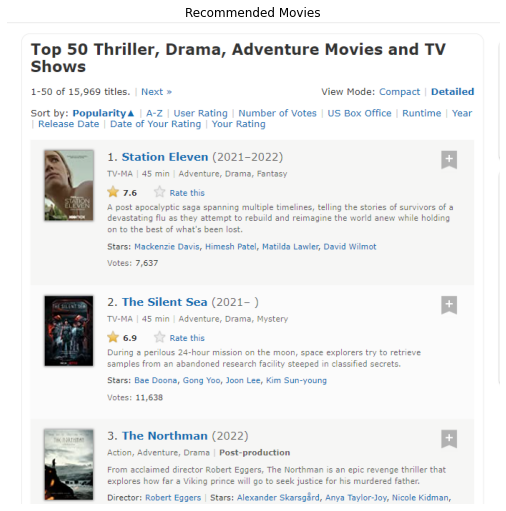

In [240]:
im = Image.open("recommendedMovies.png")
width, height = im.size # Size of the image in pixels (size of original image)
im = im.crop((0, 60, width - 300, height))
plt.figure(figsize=(70, 17))
plt.subplot(2, 10, 1)
plt.imshow(im)
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.title("Recommended Movies")
plt.show()